In [18]:
# Import Libraries
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
%matplotlib inline
import matplotlib.pyplot as plt
import pandas, numpy as np, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [19]:
# load the dataset
train = pandas.read_csv('/Users/PrasadiA/Desktop/train.csv', encoding = "unicode_escape")
test = pandas.read_csv('/Users/PrasadiA/Desktop/tests.csv', encoding = "unicode_escape")
print(train)
print(test)

      Tweet index  Label                                         Tweet text
0               1      1  Sweet United Nations video. Just in time for C...
1               2      1  @mrdahl87 We are rumored to have talked to Erv...
2               3      1  Hey there! Nice to see you Minnesota/ND Winter...
3               4      0                3 episodes left I'm dying over here
4               5      1  I can't breathe! was chosen as the most notabl...
5               6      0  You're never too old for Footie Pajamas. http:...
6               7      1  Nothing makes me happier then getting on the h...
7               8      0  4:30 an opening my first beer now gonna be a l...
8               9      0  @Adam_Klug do you think you would support a gu...
9              10      0  @samcguigan544 You are not allowed to open tha...
10             11      1  Oh, thank GOD - our entire office email system...
11             12      0  But instead, I'm scrolling through Facebook, I...
12          

In [20]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['Tweet text'], train['Label'])

In [21]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train['Tweet text'])
count_vect.fit(test['Text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [22]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
xtest_count  =   count_vect.transform(test['Text'])

x_count_train = pandas.DataFrame(xtrain_count.toarray(), columns=count_vect.get_feature_names())
x_count_valid = pandas.DataFrame(xvalid_count.toarray(), columns=count_vect.get_feature_names())

print(x_count_train)
print(x_count_valid)

      00  000  01am  02  08  0ck2vnqikr  0hxeqig7hm  0qkv1yq8t0  0wd2hh7jps  \
0      0    0     0   0   0           0           0           0           0   
1      0    0     0   0   0           0           0           0           0   
2      0    0     0   0   0           0           0           0           0   
3      0    0     0   0   0           0           0           0           0   
4      0    0     0   0   0           0           0           0           0   
5      0    0     0   0   0           0           0           0           0   
6      0    0     0   0   0           0           0           0           0   
7      0    0     0   0   0           0           0           0           0   
8      0    0     0   0   0           0           0           0           0   
9      0    0     0   0   0           0           0           0           0   
10     0    0     0   0   0           0           0           0           0   
11     0    0     0   0   0           0           0 

In [23]:
x_count_train_df = x_count_train.copy()
x_count_valid_df = x_count_valid.copy()

word_count_train = pandas.DataFrame(x_count_train_df.apply(sum,axis = 0)).reset_index()
word_count_train.columns = ['col_names','count']
word_count_train = word_count_train.sort_values(['count'],ascending = [False])
print(word_count_train)


word_count_valid = pandas.DataFrame(x_count_valid_df.apply(sum,axis = 0)).reset_index()
word_count_valid.columns = ['col_names','count']
word_count_valid = word_count_valid.sort_values(['count'],ascending = [False])
print(word_count_valid)

                col_names  count
3567                  the   1101
2483                  not   1022
1775                    i   1016
3486                    t   1010
3635                   to    924
124                     a    796
769                    co    712
1755                 http    677
3098              sarcasm    593
255                   and    495
4043                  you    491
1881                   is    489
2515                   of    470
1824                   in    458
1893                   it    424
1402                  for    401
3070                    s    395
2387                   my    391
3565                 that    360
1880                irony    353
2536                   on    313
3596                 this    225
3298                   so    216
412                    be    215
2241                   me    206
1972                 just    197
626                   can    195
3951                 with    191
334                    at    182
303       

In [24]:
#dropping the zero count words
word_count_train = word_count_train[word_count_train['count'] > 500]
print(word_count_train)

word_count_valid = word_count_valid[word_count_valid['count'] > 100]
print(word_count_valid)

     col_names  count
3567       the   1101
2483       not   1022
1775         i   1016
3486         t   1010
3635        to    924
124          a    796
769         co    712
1755      http    677
3098   sarcasm    593
     col_names  count
2483       not    367
3567       the    352
1775         i    342
3635        to    327
3486         t    321
124          a    270
769         co    227
1755      http    218
1881        is    196
3098   sarcasm    189
255        and    180
4043       you    179
1824        in    159
2387        my    154
1893        it    141
3070         s    133
2515        of    128
3565      that    124
1402       for    121
1880     irony    107
2536        on    104


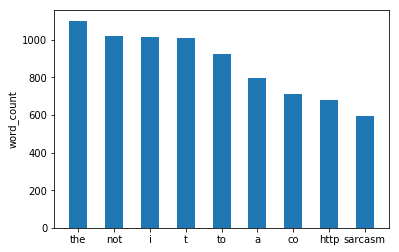

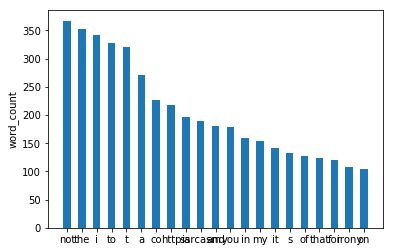

In [25]:
plt.bar(np.arange(len(word_count_train)),word_count_train['count'],0.5)
plt.xticks(np.arange(len(word_count_train)), word_count_train['col_names'])
plt.ylabel('word_count')
plt.show()

plt.bar(np.arange(len(word_count_valid)),word_count_valid['count'],0.5)
plt.xticks(np.arange(len(word_count_valid)), word_count_valid['col_names'])
plt.ylabel('word_count')
plt.show()

In [26]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, feature_vector_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    #predict the labels on tests data set
    predictions_test = classifier.predict(feature_vector_test)
    np.savetxt("prediction.csv", predictions_test, delimiter=",")
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [27]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.7194994786235662


In [28]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("LR, Count Vectors: ", accuracy)

LR, Count Vectors:  0.8571428571428571


c:\users\prasadia\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("SVM, Count Vectors: ", accuracy)

c:\users\prasadia\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM, Count Vectors:  0.5005213764337852


In [30]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count, xtest_count)
print ("RF, Count Vectors: ", accuracy)

c:\users\prasadia\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.7799791449426486
